In [8]:
import numpy as np
import image_processing

In [2]:
intrinsics = np.array([3040, # number of pixel columns
                       4056, # number of pixel rows
                       1503.0136, # U component of principal point
                       2163.4301, # V component of principal point
                       2330.4972, # U component of focal length
                       2334.0017, # V component of focal length
                       -0.3587, # radial distortion 
                       0.1388, # radial distortion
                       -0.0266, # radial distortion
                       -0.0046, # tangential distortion
                       0.0003 # tangential distortion
                       ])

extrinsics = np.array([712159.597863065, # camera x in world
                       33136.9994153273, # camera y in world
                       3.72446811607855, # camera elev in world
                       1.30039127961854, # azimuth
                       1.02781393967485, # tilt
                       -0.160877893129538 # roll/swing
                       ])

In [3]:
file_path = '/home/rmccune/depth_mapping/data/lidar/Job1051007_34077_04_88.laz'

min_x_extent = 712160
max_x_extent = 712230
min_y_extent = 33100
max_y_extent = 33170

grid_gen = image_processing.GridGenerator(file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent)

In [6]:
resolution = 0.01 # meters

pts_array = grid_gen.create_point_array()
grid_x, grid_y, grid_z = grid_gen.gen_grid(resolution, z=pts_array)

Directory to store grids already exists: generated_grids


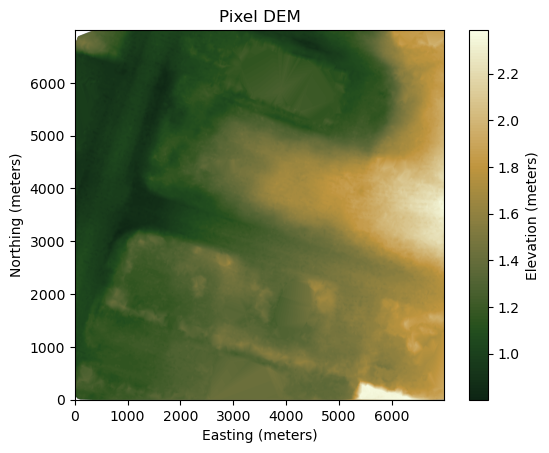

In [9]:
image_processing.utils.plot_elev_grid(grid_z)

In [10]:
rectifier = image_processing.ImageRectifier(intrinsics, extrinsics, grid_x, grid_y, grid_z, use_gpu=True)

In [11]:
images_folder = '/home/rmccune/depth_mapping/data/CB03_12272023/orig_images'
zarr_store_path = '/home/rmccune/depth_mapping_updated/data/zarr/orig_image_rects'

rectifier.merge_rectify_folder(images_folder, zarr_store_path)

Processing images: 100%|██████████| 41/41 [00:27<00:00,  1.49image/s]

All images have been successfully saved to the Zarr store.
